Input the start date(e.g:2004-08-29): 2004-08-29
Input the close date(e.g:2004-09-21): 2004-09-21


<function matplotlib.pyplot.show(close=None, block=None)>

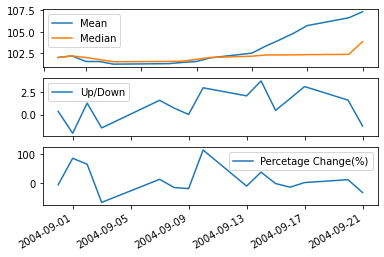

In [12]:
#Lam Wai Kin 4163745
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('Stock_Data_2_v2.csv')#read csv file
data['Date'] =pd.to_datetime(data.Date)#change to date format

start = input('Input the start date(e.g:2004-08-29): ')
end = input('Input the close date(e.g:2004-09-21): ')

data = data.sort_values(by='Date')

op = data.loc[(data['Date'] >= start ) & (data['Date'] <= end)]
op = op.reset_index(drop=True)#reset index

#caculation
calmean = op['Close'].expanding().mean()#cumulative mean
calmedian = op['Close'].expanding().median()#cumulative median
uad = op['Close'].pct_change()*100 #up/down
pc=op['Volume'].pct_change()*100 #prectage change of volume

#creat new column
op['Mean'] = calmean
op['Mediam'] = calmedian
op['Up/Down'] = uad
op['Percetage Change(%)'] = pc

#split date
op["Year"] = op["Date"].dt.year
op["Month"] = op["Date"].dt.month
op["Day"] = op["Date"].dt.day


nlist=list(op.columns)
nlist=['Year','Day','Month','Close','Open','High','Low','Volume','Mean','Mediam','Up/Down','Percetage Change(%)']
out = op[nlist]
out.round(2)
out = out.to_csv('results.csv', index = False)#output csv

#plot 3 graphs
plt.subplot(3, 1, 1)
plt.plot(op['Date'],calmean)
plt.plot(op['Date'],calmedian)
plt.legend(['Mean', 'Median'])
plt.gcf().autofmt_xdate()#format date

plt.subplot(3, 1, 2)
plt.plot(op['Date'],uad)
plt.legend(['Up/Down'])
plt.gcf().autofmt_xdate()#format date    
    
plt.subplot(3, 1, 3)
plt.plot(op['Date'],pc)
plt.legend(['Percetage Change(%)'])
plt.gcf().autofmt_xdate()#format date
    

plt.savefig('my_plot1.png')
plt.show